In [1]:
import ODE_models
import Model_stats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
## Set initial conditions
Sn_0  = (1 - 10**(-3))*(1-10**(-6))
Sa_0  = (1 - 10**(-3))*(10**(-6))
IS_0  = 10**(-3)
IAn_0 = 0
IAa_0 = 0
RS_0  = 0
RAn_0 = 0
RAa_0 = 0
M_0   = 0

params=ODE_models.get_params()

# Simulate the ODE
initial_state = np.array([Sn_0,Sa_0,IS_0,IAn_0,IAa_0,RS_0,RAn_0,RAa_0,M_0])
time = np.arange(0,1000,0.005)

#note that we must compare these also with what happens when you consider asymptomatics but not their potential behavior.
sim_system_switchingB = odeint(ODE_models.SIRan_system_switchingB, initial_state, time, args=(params,))
sim_system = odeint(ODE_models.SIRan_system, initial_state, time, args=(params,))

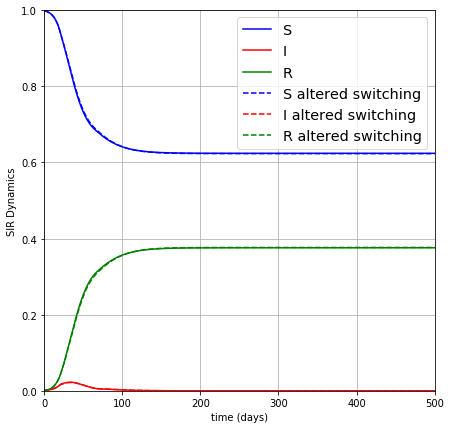

In [3]:
## Plot combined S, I, and R compartments. 

fin_time = 500

matplotlib.rcParams['figure.figsize'] = [7, 7]
fig, ax = plt.subplots()

S = sim_system[:,0]+sim_system[:,1]
I = sim_system[:,2]+sim_system[:,3]+sim_system[:,4]
R = sim_system[:,5]+sim_system[:,6]+sim_system[:,7]

Sb = sim_system_switchingB[:,0]+sim_system_switchingB[:,1]
Ib = sim_system_switchingB[:,2]+sim_system_switchingB[:,3]+sim_system_switchingB[:,4]
Rb = sim_system_switchingB[:,5]+sim_system_switchingB[:,6]+sim_system_switchingB[:,7]

S_curve, = ax.plot(time, S, '-b',label='S')
I_curve, = ax.plot(time, I, '-r',label='I')
R_curve, = ax.plot(time, R, '-g',label='R')

Sb_curve, = ax.plot(time, Sb, '--b',label='S altered switching')
Ib_curve, = ax.plot(time, Ib, '--r',label='I altered switching')
Rb_curve, = ax.plot(time, Rb, '--g',label='R altered switching')

ax.set(xlabel='time (days)', ylabel='SIR Dynamics')
ax.set_ylim((0,1))
ax.set_xlim((0,fin_time))
ax.grid()
ax.legend(loc='best',fontsize='x-large')

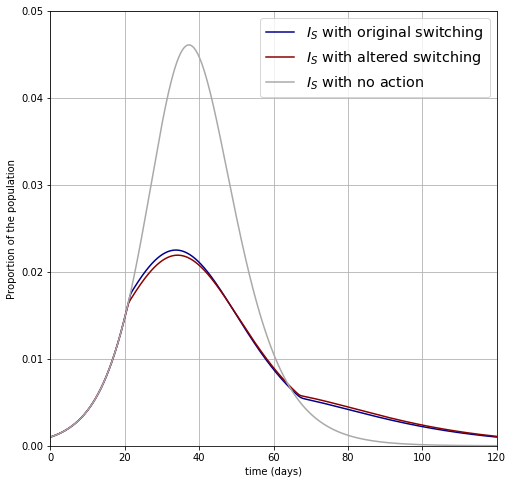

In [4]:
fin_time = 120

matplotlib.rcParams['figure.figsize'] = [8, 8]
fig, ax = plt.subplots()

I_S = sim_system[:,2]
I_Sb = sim_system_switchingB[:,2]

IS_curve, = ax.plot(time, I_S, linestyle='-', c='darkblue', label=f'$I_S$ with original switching')
ISb_curve, = ax.plot(time, I_Sb, linestyle='-', c='darkred', label=f'$I_S$ with altered switching')


# also plot what happens when the population is not responsive. 
params_noresponse = ODE_models.get_params(q=1)
noresponse_sim_system = odeint(ODE_models.SIRan_system, initial_state, time, args=(params_noresponse,))

IS_noresponse = noresponse_sim_system[:,2]
IS_noresponse_curve, = ax.plot(time, IS_noresponse, linestyle='-', c='darkgray', label=f'$I_S$ with no action')

ax.set(xlabel='time (days)', ylabel='Proportion of the population')
ax.set_ylim((0,0.05))
ax.set_xlim((0,fin_time))
ax.grid()
ax.legend(loc='best',fontsize='x-large')

Text(0.5, 0.98, 'Payoff function for q=0.9')

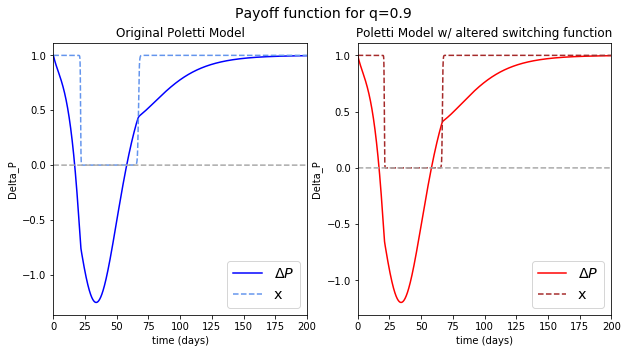

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax1 = axes[0]
ax2 = axes[1]

ax1.set(xlabel='time (days)', ylabel='Delta_P')
ax2.set(xlabel='time (days)', ylabel='Delta_P')
#ax.set_ylim((0,0.05))
#ax.set_xlim((0,120))
ax.grid()

time = np.arange(0,200,0.05)
sim_system_switchingB = odeint(ODE_models.SIRan_system_switchingB, initial_state, time, args=(params,))
sim_system = odeint(ODE_models.SIRan_system, initial_state, time, args=(params,))


delt_Pb = []
delt_P = []
for i in range(len(time)):
    delt_P.append(ODE_models.payoff_difference_asym(sim_system[i,-1],params))
    Pb_out = ODE_models.payoff_difference(sim_system_switchingB[i,-1],params)
    delt_Pb.append(Pb_out)
    
nonbehavior_comparts = sim_system[:,2]+sim_system[:,5]
nonbehavior_compartsb = sim_system_switchingB[:,2]+sim_system_switchingB[:,5]

x = (sim_system[:,0]+sim_system[:,3]+sim_system[:,6])/(np.sum(sim_system,axis=1)-nonbehavior_comparts-sim_system[:,-1])
xb = (sim_system_switchingB[:,0]+sim_system_switchingB[:,3]+sim_system_switchingB[:,6])/(np.sum(sim_system_switchingB,axis=1)-nonbehavior_compartsb-sim_system_switchingB[:,-1]) 
    
ax1.plot(time, delt_P, '-b', label=f'$\Delta P$')
ax2.plot(time, delt_Pb, '-r', label=f'$\Delta P$')
ax2.plot(time, xb, '--', c='brown', label='x')
ax1.plot(time, x, '--', c='cornflowerblue', label='x')
ax1.plot(time, np.zeros(len(time)), '--', c='darkgray')
ax2.plot(time, np.zeros(len(time)), '--', c='darkgray')
ax1.set_xlim((0,200))
ax2.set_xlim((0,200))
ax1.legend(loc='lower right',fontsize='x-large')
ax2.legend(loc='lower right',fontsize='x-large')
ax1.set_title('Original Poletti Model')
ax2.set_title('Poletti Model w/ altered switching function')

fig.suptitle('Payoff function for q=0.9', fontsize=14)

## Let's try that again but with more "out there" parameters

In [6]:
## Set initial conditions
Sn_0  = (1 - 10**(-3))*(1-10**(-6))
Sa_0  = (1 - 10**(-3))*(10**(-6))
IS_0  = 10**(-3)
IAn_0 = 0
IAa_0 = 0
RS_0  = 0
RAn_0 = 0
RAa_0 = 0
M_0   = 0

params=ODE_models.get_params(p=0.6, q=0.7)

# Simulate the ODE
initial_state = np.array([Sn_0,Sa_0,IS_0,IAn_0,IAa_0,RS_0,RAn_0,RAa_0,M_0])
time = np.arange(0,1000,0.005)

#note that we must compare these also with what happens when you consider asymptomatics but not their potential behavior.
sim_system_switchingB = odeint(ODE_models.SIRan_system_switchingB, initial_state, time, args=(params,))
sim_system = odeint(ODE_models.SIRan_system, initial_state, time, args=(params,))

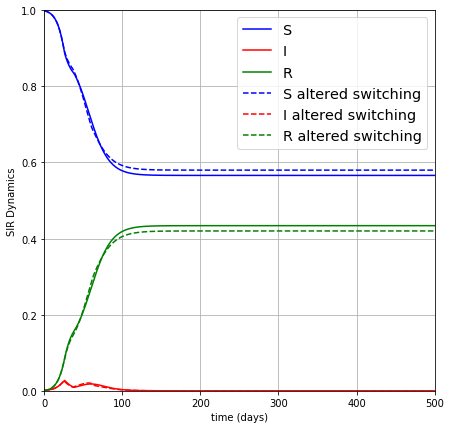

In [7]:
## Plot combined S, I, and R compartments. 

fin_time = 500

matplotlib.rcParams['figure.figsize'] = [7, 7]
fig, ax = plt.subplots()

S = sim_system[:,0]+sim_system[:,1]
I = sim_system[:,2]+sim_system[:,3]+sim_system[:,4]
R = sim_system[:,5]+sim_system[:,6]+sim_system[:,7]

Sb = sim_system_switchingB[:,0]+sim_system_switchingB[:,1]
Ib = sim_system_switchingB[:,2]+sim_system_switchingB[:,3]+sim_system_switchingB[:,4]
Rb = sim_system_switchingB[:,5]+sim_system_switchingB[:,6]+sim_system_switchingB[:,7]

S_curve, = ax.plot(time, S, '-b',label='S')
I_curve, = ax.plot(time, I, '-r',label='I')
R_curve, = ax.plot(time, R, '-g',label='R')

Sb_curve, = ax.plot(time, Sb, '--b',label='S altered switching')
Ib_curve, = ax.plot(time, Ib, '--r',label='I altered switching')
Rb_curve, = ax.plot(time, Rb, '--g',label='R altered switching')

ax.set(xlabel='time (days)', ylabel='SIR Dynamics')
ax.set_ylim((0,1))
ax.set_xlim((0,fin_time))
ax.grid()
ax.legend(loc='best',fontsize='x-large')

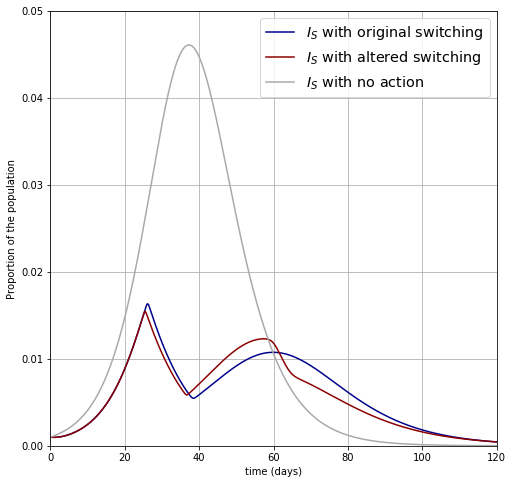

In [8]:
fin_time = 120

matplotlib.rcParams['figure.figsize'] = [8, 8]
fig, ax = plt.subplots()

I_S = sim_system[:,2]
I_Sb = sim_system_switchingB[:,2]

IS_curve, = ax.plot(time, I_S, linestyle='-', c='darkblue', label=f'$I_S$ with original switching')
ISb_curve, = ax.plot(time, I_Sb, linestyle='-', c='darkred', label=f'$I_S$ with altered switching')


# also plot what happens when the population is not responsive. 
params_noresponse = ODE_models.get_params(q=1)
noresponse_sim_system = odeint(ODE_models.SIRan_system, initial_state, time, args=(params_noresponse,))

IS_noresponse = noresponse_sim_system[:,2]
IS_noresponse_curve, = ax.plot(time, IS_noresponse, linestyle='-', c='darkgray', label=f'$I_S$ with no action')

ax.set(xlabel='time (days)', ylabel='Proportion of the population')
ax.set_ylim((0,0.05))
ax.set_xlim((0,fin_time))
ax.grid()
ax.legend(loc='best',fontsize='x-large')

Text(0.5, 1.0, 'Poletti Model w/ altered switching function')

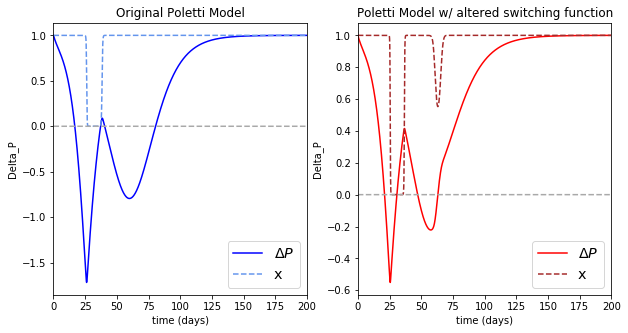

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax1 = axes[0]
ax2 = axes[1]

ax1.set(xlabel='time (days)', ylabel='Delta_P')
ax2.set(xlabel='time (days)', ylabel='Delta_P')
#ax.set_ylim((0,0.05))
#ax.set_xlim((0,120))
ax.grid()

time = np.arange(0,200,0.05)
sim_system_switchingB = odeint(ODE_models.SIRan_system_switchingB, initial_state, time, args=(params,))
sim_system = odeint(ODE_models.SIRan_system, initial_state, time, args=(params,))


delt_Pb = []
delt_P = []
for i in range(len(time)):
    delt_P.append(ODE_models.payoff_difference_asym(sim_system[i,-1],params))
    Pb_out = ODE_models.payoff_difference(sim_system_switchingB[i,-1],params)
    delt_Pb.append(Pb_out)
    
nonbehavior_comparts = sim_system[:,2]+sim_system[:,5]
nonbehavior_compartsb = sim_system_switchingB[:,2]+sim_system_switchingB[:,5]

x = (sim_system[:,0]+sim_system[:,3]+sim_system[:,6])/(np.sum(sim_system,axis=1)-nonbehavior_comparts-sim_system[:,-1])
xb = (sim_system_switchingB[:,0]+sim_system_switchingB[:,3]+sim_system_switchingB[:,6])/(np.sum(sim_system_switchingB,axis=1)-nonbehavior_compartsb-sim_system_switchingB[:,-1]) 
    
ax1.plot(time, delt_P, '-b', label=f'$\Delta P$')
ax2.plot(time, delt_Pb, '-r', label=f'$\Delta P$')
ax2.plot(time, xb, '--', c='brown', label='x')
ax1.plot(time, x, '--', c='cornflowerblue', label='x')
ax1.plot(time, np.zeros(len(time)), '--', c='darkgray')
ax2.plot(time, np.zeros(len(time)), '--', c='darkgray')
ax1.set_xlim((0,200))
ax2.set_xlim((0,200))
ax1.legend(loc='lower right',fontsize='x-large')
ax2.legend(loc='lower right',fontsize='x-large')
ax1.set_title('Original Poletti Model')
ax2.set_title('Poletti Model w/ altered switching function')

## Now that we have some evidence that they are different let's see how different they are when we add in our different payoff function

In [10]:
## Set initial conditions
Sn_0  = (1 - 10**(-3))*(1-10**(-6))
Sa_0  = (1 - 10**(-3))*(10**(-6))
IS_0  = 10**(-3)
IAn_0 = 0
IAa_0 = 0
RS_0  = 0
RAn_0 = 0
RAa_0 = 0
M_0   = 0

params=ODE_models.get_params(p=0.6, q=0.7)

# Simulate the ODE
initial_state = np.array([Sn_0,Sa_0,IS_0,IAn_0,IAa_0,RS_0,RAn_0,RAa_0,M_0])
time = np.arange(0,1000,0.005)

#note that we must compare these also with what happens when you consider asymptomatics but not their potential behavior.
sim_system_switchingB = odeint(ODE_models.SIRan_system_accessory, initial_state, time, args=(params,2,2))
sim_system = odeint(ODE_models.SIRan_system_accessory, initial_state, time, args=(params,0,2))

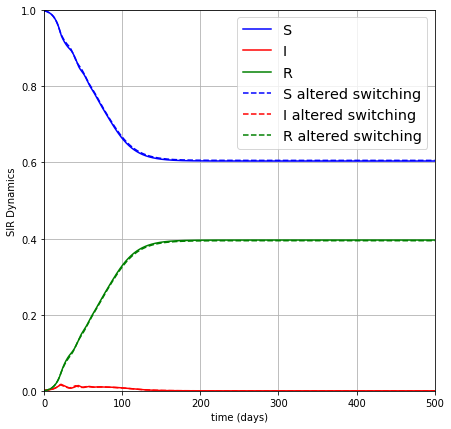

In [11]:
## Plot combined S, I, and R compartments. 

fin_time = 500

matplotlib.rcParams['figure.figsize'] = [7, 7]
fig, ax = plt.subplots()

S = sim_system[:,0]+sim_system[:,1]
I = sim_system[:,2]+sim_system[:,3]+sim_system[:,4]
R = sim_system[:,5]+sim_system[:,6]+sim_system[:,7]

Sb = sim_system_switchingB[:,0]+sim_system_switchingB[:,1]
Ib = sim_system_switchingB[:,2]+sim_system_switchingB[:,3]+sim_system_switchingB[:,4]
Rb = sim_system_switchingB[:,5]+sim_system_switchingB[:,6]+sim_system_switchingB[:,7]

S_curve, = ax.plot(time, S, '-b',label='S')
I_curve, = ax.plot(time, I, '-r',label='I')
R_curve, = ax.plot(time, R, '-g',label='R')

Sb_curve, = ax.plot(time, Sb, '--b',label='S altered switching')
Ib_curve, = ax.plot(time, Ib, '--r',label='I altered switching')
Rb_curve, = ax.plot(time, Rb, '--g',label='R altered switching')

ax.set(xlabel='time (days)', ylabel='SIR Dynamics')
ax.set_ylim((0,1))
ax.set_xlim((0,fin_time))
ax.grid()
ax.legend(loc='best',fontsize='x-large')

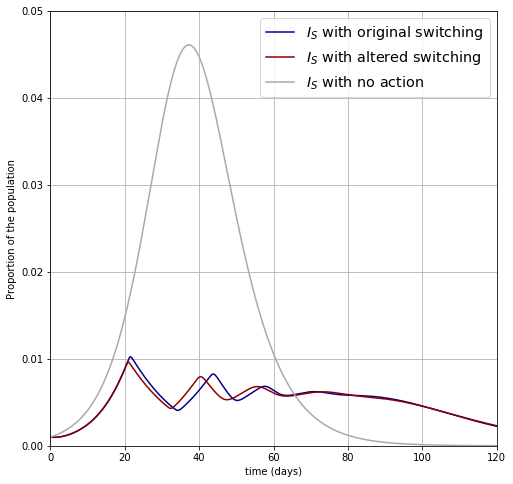

In [12]:
fin_time = 120

matplotlib.rcParams['figure.figsize'] = [8, 8]
fig, ax = plt.subplots()

I_S = sim_system[:,2]
I_Sb = sim_system_switchingB[:,2]

IS_curve, = ax.plot(time, I_S, linestyle='-', c='darkblue', label=f'$I_S$ with original switching')
ISb_curve, = ax.plot(time, I_Sb, linestyle='-', c='darkred', label=f'$I_S$ with altered switching')


# also plot what happens when the population is not responsive. 
params_noresponse = ODE_models.get_params(q=1)
noresponse_sim_system = odeint(ODE_models.SIRan_system, initial_state, time, args=(params_noresponse,))

IS_noresponse = noresponse_sim_system[:,2]
IS_noresponse_curve, = ax.plot(time, IS_noresponse, linestyle='-', c='darkgray', label=f'$I_S$ with no action')

ax.set(xlabel='time (days)', ylabel='Proportion of the population')
ax.set_ylim((0,0.05))
ax.set_xlim((0,fin_time))
ax.grid()
ax.legend(loc='best',fontsize='x-large')

Text(0.5, 0.98, 'Behavior Comparison -- beta_S=0.7, q=0.5, p=0.6')

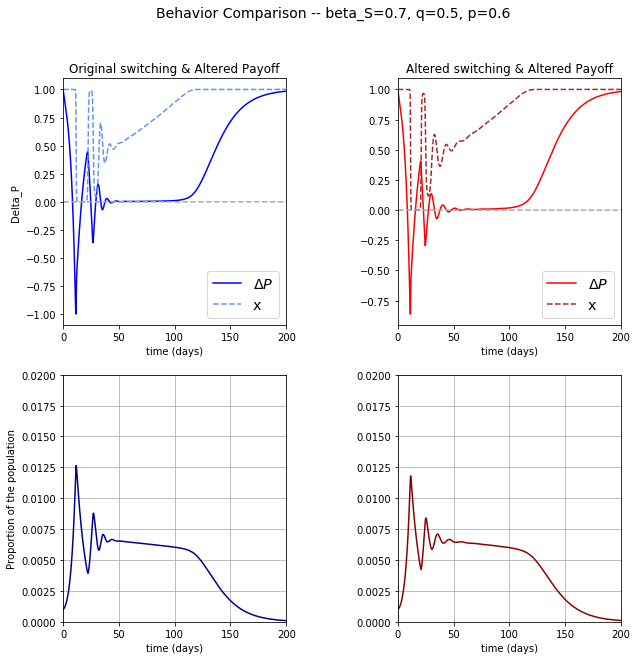

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
plt.subplots_adjust(wspace=0.5)

ax1t = axes[0][0]
ax2t = axes[0][1]
ax1b = axes[1][0]
ax2b = axes[1][1]

ax1t.set(xlabel='time (days)', ylabel='Delta_P')
ax2t.set(xlabel='time (days)')
#ax.set_ylim((0,0.05))
#ax.set_xlim((0,120))

time = np.arange(0,200,0.05)
params = ODE_models.get_params(beta_S=0.7, q=0.5,p=0.6)
sim_system_switchingB = odeint(ODE_models.SIRan_system_accessory, initial_state, time, args=(params,2,2))
sim_system = odeint(ODE_models.SIRan_system_accessory, initial_state, time, args=(params,0,2))


delt_Pb = []
delt_P = []
for i in range(len(time)):
    delt_P.append(ODE_models.payoffB_difference(sim_system[i,-1],sim_system[i,1],sim_system[i,4],sim_system[i,7],params))
    Pb_out = ODE_models.payoffB_difference(sim_system_switchingB[i,-1],sim_system_switchingB[i,1],sim_system_switchingB[i,4],sim_system_switchingB[i,7],params)
    delt_Pb.append(Pb_out)
    
nonbehavior_comparts = sim_system[:,2]+sim_system[:,5]
nonbehavior_compartsb = sim_system_switchingB[:,2]+sim_system_switchingB[:,5]

x = (sim_system[:,0]+sim_system[:,3]+sim_system[:,6])/(np.sum(sim_system,axis=1)-nonbehavior_comparts-sim_system[:,-1])
xb = (sim_system_switchingB[:,0]+sim_system_switchingB[:,3]+sim_system_switchingB[:,6])/(np.sum(sim_system_switchingB,axis=1)-nonbehavior_compartsb-sim_system_switchingB[:,-1]) 
    
ax1t.plot(time, delt_P, '-b', label=f'$\Delta P$')
ax2t.plot(time, delt_Pb, '-r', label=f'$\Delta P$')
ax2t.plot(time, xb, '--', c='brown', label='x')
ax1t.plot(time, x, '--', c='cornflowerblue', label='x')
ax1t.plot(time, np.zeros(len(time)), '--', c='darkgray')
ax2t.plot(time, np.zeros(len(time)), '--', c='darkgray')
ax1t.set_xlim((0,200))
ax2t.set_xlim((0,200))
ax1t.legend(loc='lower right',fontsize='x-large')
ax2t.legend(loc='lower right',fontsize='x-large')
ax1t.set_title('Original switching & Altered Payoff')
ax2t.set_title('Altered switching & Altered Payoff')


I_S = sim_system[:,2]
I_Sb = sim_system_switchingB[:,2]

IS_curve, = ax1b.plot(time, I_S, linestyle='-', c='darkblue', label=f'$I_S$ with original switching')
ISb_curve, = ax2b.plot(time, I_Sb, linestyle='-', c='darkred', label=f'$I_S$ with altered switching')

ax1b.set(xlabel='time (days)', ylabel='Proportion of the population')
ax1b.set_ylim((0,0.02))
ax1b.set_xlim((0,200))
ax1b.grid()
ax2b.set(xlabel='time (days)')
ax2b.set_ylim((0,0.02))
ax2b.set_xlim((0,200))
ax2b.grid()

fig.suptitle('Behavior Comparison -- beta_S=0.7, q=0.5, p=0.6', fontsize=14)

Text(0.5, 0.98, 'Behavior Comparison -- beta_S=0.7, beta_A=0.6 q=0.5, p=0.6')

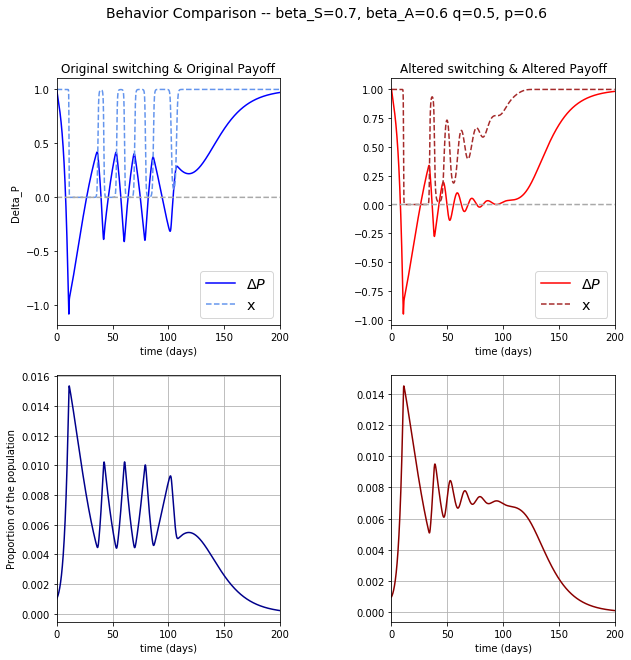

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
plt.subplots_adjust(wspace=0.5)

ax1t = axes[0][0]
ax2t = axes[0][1]
ax1b = axes[1][0]
ax2b = axes[1][1]

ax1t.set(xlabel='time (days)', ylabel='Delta_P')
ax2t.set(xlabel='time (days)')
#ax.set_ylim((0,0.05))
#ax.set_xlim((0,120))

time = np.arange(0,200,0.05)
params = ODE_models.get_params(beta_S=0.7, q=0.6,p=0.7)
sim_system_switchingB = odeint(ODE_models.SIRan_system_accessory, initial_state, time, args=(params,2,2))
sim_system = odeint(ODE_models.SIRan_system_accessory, initial_state, time, args=(params,0,1))


delt_Pb = []
delt_P = []
for i in range(len(time)):
    delt_P.append(ODE_models.payoffB_difference(sim_system[i,-1],sim_system[i,1],sim_system[i,4],sim_system[i,7],params))
    Pb_out = ODE_models.payoffB_difference(sim_system_switchingB[i,-1],sim_system_switchingB[i,1],sim_system_switchingB[i,4],sim_system_switchingB[i,7],params)
    delt_Pb.append(Pb_out)
    
nonbehavior_comparts = sim_system[:,2]+sim_system[:,5]
nonbehavior_compartsb = sim_system_switchingB[:,2]+sim_system_switchingB[:,5]

x = (sim_system[:,0]+sim_system[:,3]+sim_system[:,6])/(np.sum(sim_system,axis=1)-nonbehavior_comparts-sim_system[:,-1])
xb = (sim_system_switchingB[:,0]+sim_system_switchingB[:,3]+sim_system_switchingB[:,6])/(np.sum(sim_system_switchingB,axis=1)-nonbehavior_compartsb-sim_system_switchingB[:,-1]) 
    
ax1t.plot(time, delt_P, '-b', label=f'$\Delta P$')
ax2t.plot(time, delt_Pb, '-r', label=f'$\Delta P$')
ax2t.plot(time, xb, '--', c='brown', label='x')
ax1t.plot(time, x, '--', c='cornflowerblue', label='x')
ax1t.plot(time, np.zeros(len(time)), '--', c='darkgray')
ax2t.plot(time, np.zeros(len(time)), '--', c='darkgray')
ax1t.set_xlim((0,200))
ax2t.set_xlim((0,200))
ax1t.legend(loc='lower right',fontsize='x-large')
ax2t.legend(loc='lower right',fontsize='x-large')
ax1t.set_title('Original switching & Original Payoff')
ax2t.set_title('Altered switching & Altered Payoff')


I_S = sim_system[:,2]
I_Sb = sim_system_switchingB[:,2]

IS_curve, = ax1b.plot(time, I_S, linestyle='-', c='darkblue', label=f'$I_S$ with original switching')
ISb_curve, = ax2b.plot(time, I_Sb, linestyle='-', c='darkred', label=f'$I_S$ with altered switching')

ax1b.set(xlabel='time (days)', ylabel='Proportion of the population')
ax1b.set_xlim((0,200))
ax1b.grid()
ax2b.set(xlabel='time (days)')
ax2b.set_xlim((0,200))
ax2b.grid()

fig.suptitle('Behavior Comparison -- beta_S=0.7, q=0.6,p=0.7', fontsize=14)

## Let's look for bifurcations in the behavior in the altered payoff and switching framework

In [27]:
## Look at the change in the epidemic characteristics based on changing q

time = np.arange(0,120,0.005)

final_size = []
peak_size = []
peak_day = []

final_sizeb = []
peak_sizeb = []
peak_dayb = []

num_peaks = []
num_peaksB = []
sum_peaks = []
sum_peaksB = []

p_test_set = np.arange(0.5,1.025,0.025)

for p_test in p_test_set:
    
    params = ODE_models.get_params(beta_S = 0.7, q=0.6,p=p_test)
    sim_system = odeint(ODE_models.SIRan_system_accessory, initial_state, time, args=(params,0,1))
    sim_system_alt = odeint(ODE_models.SIRan_system_accessory, initial_state, time, args=(params,2,2))
    
    final_size.append(Model_stats.final_epi_size(sim_system, time))
    final_sizeb.append(Model_stats.final_epi_size(sim_system_alt, time))
    
    peaks_data = Model_stats.peak_data(sim_system,time)
    peaks_dataB = Model_stats.peak_data(sim_system_alt,time)
    sum_peaks.append(sum(peaks_data[1]))
    sum_peaksB.append(sum(peaks_dataB[1]))
    num_peaks.append(len(peaks_data[0]))
    num_peaksB.append(len(peaks_dataB[0]))
    
    p_day, p_size = Model_stats.daily_peak(sim_system,time,peak_type='all I', data_type='SIR')
    p_dayb, p_sizeb = Model_stats.daily_peak(sim_system_alt,time,peak_type='all I', data_type='SIR')
    peak_size.append(p_size)
    peak_day.append(p_day)
    peak_sizeb.append(p_sizeb)
    peak_dayb.append(p_dayb)

final_size = np.array(final_size)
peak_size = np.array(peak_size)
peak_day = np.array(peak_day)
final_sizeb = np.array(final_sizeb)
peak_sizeb = np.array(peak_sizeb)
peak_dayb = np.array(peak_dayb)
num_peaks = np.array(num_peaks)
num_peaksB = np.array(num_peaksB)
sum_peaks = np.array(sum_peaks)
sum_peaksB = np.array(sum_peaksB)
avg_peaks = sum_peaks/num_peaks
avg_peaksB = sum_peaksB/num_peaksB

In [28]:
def bif_diag(x,y,yb,x_lab, y_lab):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    plt.subplots_adjust(wspace=0.3)
    
    ax1 = axes[0]
    ax2 = axes[1]
    ax1.set(xlabel=x_lab, ylabel=y_lab)
    ax2.set(xlabel=x_lab)

    ax1.set_title('Original switching & Original Payoff')
    ax2.set_title('Altered switching & Altered Payoff')

    ax1.grid()
    ax2.grid()

    ax1.plot(x, y, '-o', c='forestgreen')
    ax2.plot(x, yb, '-o', c='forestgreen')
    
    y1_lim = ax1.get_ylim()
    y2_lim = ax2.get_ylim()
    
    ax1.set_ylim((min(y1_lim[0],y2_lim[0]),max(y1_lim[1],y2_lim[1])))
    ax2.set_ylim((min(y1_lim[0],y2_lim[0]),max(y1_lim[1],y2_lim[1])))
    
    return 

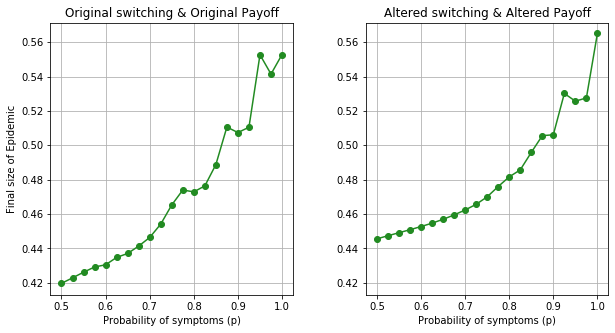

In [29]:
bif_diag(p_test_set,final_size, final_sizeb, 'Probability of symptoms (p)', 'Final size of Epidemic')

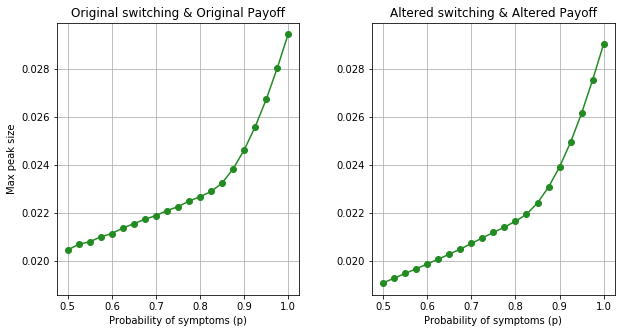

In [30]:
bif_diag(p_test_set, peak_size, peak_sizeb, 'Probability of symptoms (p)', 'Max peak size')

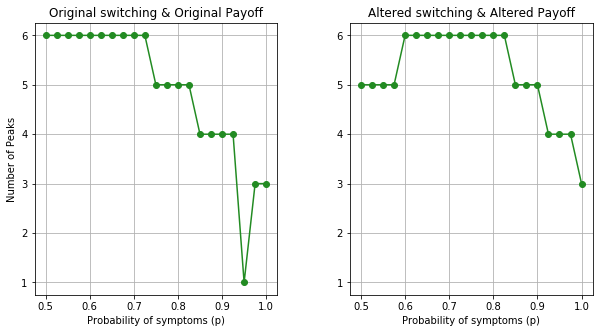

In [31]:
bif_diag(p_test_set, num_peaks, num_peaksB, 'Probability of symptoms (p)', 'Number of Peaks')

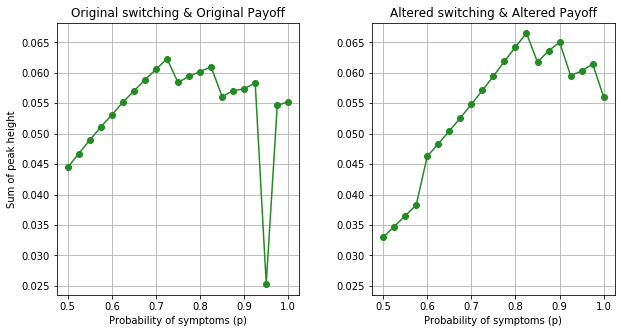

In [32]:
bif_diag(p_test_set, sum_peaks, sum_peaksB, 'Probability of symptoms (p)', 'Sum of peak height')

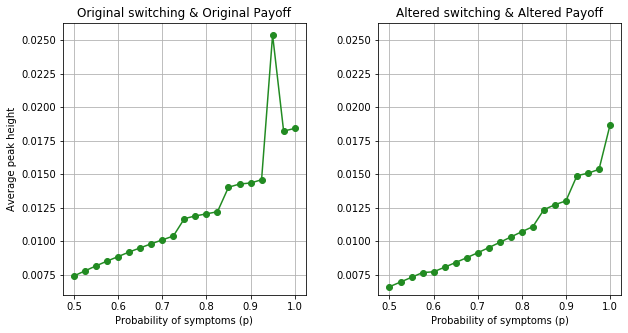

In [33]:
bif_diag(p_test_set, avg_peaks, avg_peaksB, 'Probability of symptoms (p)', 'Average peak height')